In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('Set2')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# This below is the dataset of Land use across different countries

In [389]:
land= pd.read_csv("Inputs_Land.csv") 

In [390]:

land.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,A
1,2,'004,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,A
2,2,'004,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,A
3,2,'004,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,A
4,2,'004,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,A


In [391]:
# Dataset basic infomation
land.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376295 entries, 0 to 376294
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Area Code        376295 non-null  int64  
 1   Area Code (M49)  376295 non-null  object 
 2   Area             376295 non-null  object 
 3   Item Code        376295 non-null  int64  
 4   Item             376295 non-null  object 
 5   Element Code     376295 non-null  int64  
 6   Element          376295 non-null  object 
 7   Year Code        376295 non-null  int64  
 8   Year             376295 non-null  int64  
 9   Unit             376295 non-null  object 
 10  Value            376295 non-null  float64
 11  Flag             376295 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 34.5+ MB


In [392]:
land['Item'].unique()

array(['Country area', 'Land area', 'Agriculture', 'Agricultural land',
       'Cropland', 'Arable land', 'Temporary crops',
       'Temporary meadows and pastures', 'Temporary fallow',
       'Permanent crops', 'Permanent meadows and pastures',
       'Perm. meadows & pastures - Nat. growing', 'Forest land',
       'Naturally regenerating forest', 'Planted Forest', 'Other land',
       'Inland waters', 'Land area equipped for irrigation',
       'Land area actually irrigated',
       'Agriculture area actually irrigated',
       'Agriculture area under organic agric.',
       'Agriculture area certified organic', 'Primary Forest',
       'Farm buildings and Farmyards', 'Coastal waters',
       'Cropland area actually irrigated',
       'Cropland area under organic agric.',
       'Cropland area certified organic',
       'Cropland area under protective cover',
       'Perm. meadows & pastures - Cultivated',
       'Land used for aquaculture',
       'Perm. meadows & pastures area actu

In [393]:
land[land["Area"]=="Spain"].head(60)
# We can observe that Land use dataset has

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
272128,203,'724,Spain,6600,Country area,5110,Area,1961,1961,1000 ha,50599.0000,A
272129,203,'724,Spain,6600,Country area,5110,Area,1962,1962,1000 ha,50599.0000,A
272130,203,'724,Spain,6600,Country area,5110,Area,1963,1963,1000 ha,50599.0000,A
272131,203,'724,Spain,6600,Country area,5110,Area,1964,1964,1000 ha,50599.0000,A
272132,203,'724,Spain,6600,Country area,5110,Area,1965,1965,1000 ha,50599.0000,A
272133,203,'724,Spain,6600,Country area,5110,Area,1966,1966,1000 ha,50599.0000,A
272134,203,'724,Spain,6600,Country area,5110,Area,1967,1967,1000 ha,50599.0000,A
272135,203,'724,Spain,6600,Country area,5110,Area,1968,1968,1000 ha,50599.0000,A
272136,203,'724,Spain,6600,Country area,5110,Area,1969,1969,1000 ha,50599.0000,A
272137,203,'724,Spain,6600,Country area,5110,Area,1970,1970,1000 ha,50599.0000,A


# Checkig for possible null values


In [394]:
land.isna().any()
# we can see that we do not have any NaN value as the return value is False

Area Code          False
Area Code (M49)    False
Area               False
Item Code          False
Item               False
Element Code       False
Element            False
Year Code          False
Year               False
Unit               False
Value              False
Flag               False
dtype: bool

In [395]:
land.isnull().sum() # There is also no Null values

Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
dtype: int64

# Basic EDA for getting some insight of the data

In [396]:
# we can see that land dataset has 376295 row and 12 columns
land.shape

(376295, 12)

In [397]:
# Number of countries in our dataset
country=land["Area"].unique()
len(country)

281

In [398]:

land[land["Area"]=="Afghanistan"].head(30)
# We can observe Item column has different values for each Country

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,'004,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,A
1,2,'004,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,A
2,2,'004,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,A
3,2,'004,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,A
4,2,'004,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,A
5,2,'004,Afghanistan,6600,Country area,5110,Area,1966,1966,1000 ha,65286.0,A
6,2,'004,Afghanistan,6600,Country area,5110,Area,1967,1967,1000 ha,65286.0,A
7,2,'004,Afghanistan,6600,Country area,5110,Area,1968,1968,1000 ha,65286.0,A
8,2,'004,Afghanistan,6600,Country area,5110,Area,1969,1969,1000 ha,65286.0,A
9,2,'004,Afghanistan,6600,Country area,5110,Area,1970,1970,1000 ha,65286.0,A


In [399]:
# Let see all the unique values that Item column has for each country. Lets take example of Afghanistan.
country= land[land['Area'] == 'Afghanistan']


unique_items = country['Item'].unique()

print(unique_items)

# As we can see each country has data on different types of land. however, we may not need all types of this data
# becuase we will only deal with relevant values. So after merging two dataset we may drop irrelevant values

['Country area' 'Land area' 'Agriculture' 'Agricultural land' 'Cropland'
 'Arable land' 'Temporary crops' 'Temporary meadows and pastures'
 'Temporary fallow' 'Permanent crops' 'Permanent meadows and pastures'
 'Perm. meadows & pastures - Nat. growing' 'Forest land'
 'Naturally regenerating forest' 'Planted Forest' 'Other land'
 'Inland waters' 'Land area equipped for irrigation'
 'Land area actually irrigated' 'Agriculture area actually irrigated'
 'Agriculture area under organic agric.'
 'Agriculture area certified organic' 'Primary Forest']


In [400]:
#Se
land= land[land["Item"]=="Agricultural land"]
land.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
183,2,'004,Afghanistan,6610,Agricultural land,5110,Area,1961,1961,1000 ha,37750.0,I
184,2,'004,Afghanistan,6610,Agricultural land,5110,Area,1962,1962,1000 ha,37800.0,I
185,2,'004,Afghanistan,6610,Agricultural land,5110,Area,1963,1963,1000 ha,37850.0,I
186,2,'004,Afghanistan,6610,Agricultural land,5110,Area,1964,1964,1000 ha,37905.0,I
187,2,'004,Afghanistan,6610,Agricultural land,5110,Area,1965,1965,1000 ha,37910.0,I


In [401]:
# Creating a pivot table to transform the years from rows into columns to normalize the dataset + adding the column 'Area' which has the countries names
# land = land[['Area', 'Year', 'Value']]
land = land.pivot_table(values='Value', index='Area', columns=['Year'], aggfunc='first')
land['Area'] = land.index
land.head()

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Area
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,37750.00,37800.00,37850.00,37905.00,37910.00,37955.00,37979.00,37980.00,37996.00,38006.00,38036.00,38048.00,38049.20,38050.30,38050.30,38050.00,38050.00,38050.00,38049.00,38049.00,38053.00,38054.00,38054.00,38054.00,38054.00,38054.00,38045.00,38040.00,38040.00,38040.00,38030.000,38030.000,37934.000,37813.000,37763.000,37757.000,37795.000,37868.000,37764.000,37794.000,37795.000,37790.000,37884.000,37928.000,37917.000,37910.000,37914.000,37916.000,37916.000,37917.000,37915.000,37914.000,37910.000,37910.00,37910.000,37910.000,3.791000e+04,3.801000e+04,38010.000,38313.000,38313.000,Afghanistan
Africa,1012199.68,1012206.68,1013119.68,1013401.68,1014261.68,1015406.68,1016146.68,1018160.68,1019703.68,1020710.68,1024182.68,1025431.68,1025267.68,1025565.68,1026716.68,1028143.68,1028930.68,1031069.68,1031663.68,1033588.68,1030477.68,1031627.92,1033468.42,1034809.94,1039320.68,1043781.68,1046444.68,1051509.68,1055067.68,1057285.67,1060344.872,1066541.214,1054439.344,1061716.066,1068350.557,1072452.334,1076576.360,1079052.948,1083912.273,1087328.226,1090851.524,1093305.902,1099931.307,1102045.558,1110269.033,1112907.313,1116986.963,1120005.193,1125266.016,1129492.566,1133491.889,1139459.619,1144302.086,1146326.49,1149355.851,1152308.209,1.154932e+06,1.157663e+06,1158501.100,1160685.959,1161738.719,Africa
Albania,1232.00,1232.00,1233.00,1230.00,1237.00,1240.00,1244.00,1240.00,1235.00,1230.00,1200.00,1174.00,1146.00,1122.00,1080.00,1075.00,1109.00,1114.00,1117.00,1118.00,1116.00,1114.00,1110.00,1113.00,1112.00,1111.00,1111.00,1117.00,1110.00,1121.00,1127.000,1127.000,1126.000,1126.000,1127.000,1131.000,1135.000,1139.000,1145.000,1144.000,1139.000,1140.000,1121.000,1122.000,1077.000,1120.000,1119.000,1181.000,1201.300,1201.300,1201.000,1201.300,1187.300,1174.29,1174.300,1181.700,1.174281e+03,1.174081e+03,1174.000,1165.555,1136.330,Albania
Algeria,45471.00,44900.00,44510.00,44164.00,44167.00,44167.00,44251.00,44203.00,44203.00,44216.00,45433.00,45396.00,44304.00,44336.00,43753.00,44021.00,43832.00,43843.00,43820.00,43830.00,39171.00,39107.00,39282.00,39610.00,39051.00,38688.00,38779.00,38817.00,38760.00,38676.00,38622.000,38865.000,38862.000,39640.000,39649.000,39636.000,39690.000,39826.000,39731.000,40021.000,40109.000,39855.000,39905.700,41145.000,41211.000,41181.000,41252.000,41309.000,41380.000,41374.000,41388.000,41398.190,41431.635,41431.00,41456.400,41360.200,4.133514e+04,4.133885e+04,41316.071,41316.071,41316.071,Algeria
American Samoa,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.93,1.964,1.998,2.032,2.066,2.100,2.134,2.168,2.202,2.236,2.270,2.300,2.330,2.360,2.390,2.420,2.450,2.480,2.510,2.540,2.570,2.600,2.630,2.660,2.69,2.720,2.750,2.780000e+00,2.810000e+00,2.840,2.870,2.900,American Samoa


In [402]:
land.index

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Americas', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       ...
       'Wallis and Futuna Islands', 'Western Africa', 'Western Asia',
       'Western Europe', 'Western Sahara', 'World', 'Yemen', 'Yugoslav SFR',
       'Zambia', 'Zimbabwe'],
      dtype='object', name='Area', length=270)

# This below is our second dataset, Urbanization growth across different countries

In [403]:
urban= pd.read_csv("urban.csv")
urban.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1982.000000,1983.000000,1984.000000,1985.000000,1986.000000,1987.000000,1988.000000,1989.00000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,1996.000000,1997.000000,1998.000000,1999.000000,2000.00000,2001.000000,2002.00000,2003.000000,2004.000000,2005.000000,2006.000000,2007.000000,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000
2,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.77600,50.76100,50.746000,50.730000,50.715000,50.700000,50.685000,50.67000,50.654000,50.639000,50.624000,50.609000,50.593000,50.578000,50.563000,50.548000,50.532000,50.517000,50.502000,50.487000,50.472000,50.45600,50.441000,50.426000,50.411000,50.395000,50.380000,50.365000,50.350000,50.33500,50.319000,50.304000,49.998000,49.588000,49.177000,48.767000,48.356000,47.946000,47.536000,47.127000,46.71700,46.339000,45.97200,45.606000,45.240000,44.875000,44.511000,44.147000,43.783000,43.421000,43.059000,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
3,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.56381,14.81141,15.069249,15.347976,15.640195,15.941282,16.255177,16.57431,16.899608,17.234518,17.551967,17.875321,18.220535,18.562342,18.878899,19.201205,19.524125,19.860438,20.215096,20.555022,20.876112,21.16569,21.445106,21.787107,22.192536,22.645105,23.148128,23.659649,24.173549,24.68285,25.202799,25.645146,26.073874,26.509823,26.948709,27.335288,27.624897,27.911072,28.203375,28.489868,28.77278,29.071591,29.38619,29.698419,30.014148,30.349869,30.676066,30.934766,31.343241,31.757526,32.181291,32.617692,33.040474,33.476212,33.936963,34.425584,34.894753,35.358901,35.847598,36.336259,36.828302,37.323699,37.825158
4,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.40100,8.68400,8.976000,9.276000,9.586000,9.904000,10.233000,10.57000,10.918000,11.275000,11.643000,12.021000,12.410000,12.809000,13.219000,13.641000,14.074000,14.517000,14.973000,15.442000,15.995000,16.56200,17.147000,17.747000,18.365000,18.997000,19.647000,20.314000,20.998000,21.08800,21.177000,21.266000,21.355000,21.444000,21.534000,21.624000,21.714000,21.805000,21.895000,21.986000,22.07800,22.169000,22.26100,22.353000,22.500000,22.703000,22.907000,23.113000,23.320000,23.528000,23.737000,23.948000,24.160000,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000


# Checkig for possible null values in Urban dataset

In [404]:
urban.isna().any().any() 
# We can see that there is NAN values in our Urban dataset


True

In [405]:
missing_value_counts = urban.isna().sum()
missing_value_counts
# Here we can see the number of NAN values in each column

Country Name      2
Country Code      2
Indicator Name    2
Indicator Code    2
1960              5
                 ..
2018              4
2019              4
2020              4
2021              4
2022              4
Length: 67, dtype: int64

In [406]:
missing_percentage = (urban.isna().sum() / len(urban)) * 100
missing_percentage # Here we can check the percentage of NaN values in our dataset
# we can see that it is a minimul value we can drop it. I would not recommeding imputing it as we will not have 
#accurate analysis and also it not a huge percentage. Therefore, it will not be a loss.


Country Name      0.746269
Country Code      0.746269
Indicator Name    0.746269
Indicator Code    0.746269
1960              1.865672
                    ...   
2018              1.492537
2019              1.492537
2020              1.492537
2021              1.492537
2022              1.492537
Length: 67, dtype: float64

# We should remove NaN values before proceeding with merging the datasets

In [407]:
# Using urban.head() we can see that there are two rows With NAN values that need to be removed or dropped
urban.dropna(inplace=True)


In [408]:
urban.isna().sum() # we can see that now our dataset is clean.

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

In [409]:
urban.isnull().sum() 

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2018              0
2019              0
2020              0
2021              0
2022              0
Length: 67, dtype: int64

In [410]:
urban.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.67000,50.654000,50.639000,50.624000,50.609000,50.593000,50.578000,50.563000,50.548000,50.532000,50.517000,50.502000,50.487000,50.472000,50.456000,50.441000,50.426000,50.411000,50.395000,50.380000,50.365000,50.350000,50.335000,50.319000,50.304000,49.998000,49.588000,49.177000,48.767000,48.356000,47.946000,47.536000,47.127000,46.717000,46.339000,45.972000,45.606000,45.240000,44.875000,44.511000,44.147000,43.783000,43.421000,43.059000,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
3,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,16.255177,16.57431,16.899608,17.234518,17.551967,17.875321,18.220535,18.562342,18.878899,19.201205,19.524125,19.860438,20.215096,20.555022,20.876112,21.165690,21.445106,21.787107,22.192536,22.645105,23.148128,23.659649,24.173549,24.682850,25.202799,25.645146,26.073874,26.509823,26.948709,27.335288,27.624897,27.911072,28.203375,28.489868,28.772780,29.071591,29.386190,29.698419,30.014148,30.349869,30.676066,30.934766,31.343241,31.757526,32.181291,32.617692,33.040474,33.476212,33.936963,34.425584,34.894753,35.358901,35.847598,36.336259,36.828302,37.323699,37.825158
4,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,10.233000,10.57000,10.918000,11.275000,11.643000,12.021000,12.410000,12.809000,13.219000,13.641000,14.074000,14.517000,14.973000,15.442000,15.995000,16.562000,17.147000,17.747000,18.365000,18.997000,19.647000,20.314000,20.998000,21.088000,21.177000,21.266000,21.355000,21.444000,21.534000,21.624000,21.714000,21.805000,21.895000,21.986000,22.078000,22.169000,22.261000,22.353000,22.500000,22.703000,22.907000,23.113000,23.320000,23.528000,23.737000,23.948000,24.160000,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000
5,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,17.207956,17.65248,18.110952,18.582005,19.052719,19.593378,20.149754,20.716321,21.294943,21.883124,22.487663,23.053983,23.620775,24.100332,24.585094,25.192578,25.797807,26.408432,27.049291,27.731123,28.404992,29.070641,29.725470,30.365456,30.970541,31.410330,31.837491,32.259126,32.666270,33.067283,33.474074,33.927806,34.393293,34.863518,35.337049,35.944908,36.554881,37.173313,37.798977,38.434484,39.079304,39.721598,40.360535,41.001512,41.647158,42.288299,42.925885,43.554094,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831,48.454806,49.047385
6,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,12.965000,13.44100,13.932000,14.436000,14.957000,15.632000,16.455000,17.310000,18.202000,19.128000,20.092000,21.088000,22.122000,23.192000,24.298000,25.437000,26.612000,27.821000,29.065000,30.338000,31.643000,32.978000,34.343000,35.731000,37.144000,38.580000,40.039000,41.511000,43.000000,44.169000,45.346000,46.525000,47.710000,48.897000,50.087000,51.274000,52.461000,53.645000,54.827000,56.000000,56.764000,57.524000,58.282000,59.034000,59.783000,60.528000,61.268000,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000


In [411]:
urban.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 2 to 267
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    263 non-null    object 
 1   Country Code    263 non-null    object 
 2   Indicator Name  263 non-null    object 
 3   Indicator Code  263 non-null    object 
 4   1960            263 non-null    float64
 5   1961            263 non-null    float64
 6   1962            263 non-null    float64
 7   1963            263 non-null    float64
 8   1964            263 non-null    float64
 9   1965            263 non-null    float64
 10  1966            263 non-null    float64
 11  1967            263 non-null    float64
 12  1968            263 non-null    float64
 13  1969            263 non-null    float64
 14  1970            263 non-null    float64
 15  1971            263 non-null    float64
 16  1972            263 non-null    float64
 17  1973            263 non-null    float64


In [412]:
#The urban datast has 263 rows and 67 columns
urban.shape

(263, 67)

In [413]:
# renaming the column containing the names of the countries to Area in accordance with the land dataset
urban = urban.rename(index={'Country Name': 'Area'})
urban = urban.rename(columns={'Country Name': 'Area'})
urban


,Area,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,50.685000,50.67000,50.654000,50.639000,50.624000,50.609000,50.593000,50.578000,50.563000,50.548000,50.532000,50.517000,50.502000,50.487000,50.472000,50.456000,50.441000,50.426000,50.411000,50.395000,50.380000,50.365000,50.350000,50.335000,50.319000,50.304000,49.998000,49.588000,49.177000,48.767000,48.356000,47.946000,47.536000,47.127000,46.717000,46.339000,45.972000,45.606000,45.240000,44.875000,44.511000,44.147000,43.783000,43.421000,43.059000,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000
3,Africa Eastern and Southern,AFE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.563810,14.811410,15.069249,15.347976,15.640195,15.941282,16.255177,16.57431,16.899608,17.234518,17.551967,17.875321,18.220535,18.562342,18.878899,19.201205,19.524125,19.860438,20.215096,20.555022,20.876112,21.165690,21.445106,21.787107,22.192536,22.645105,23.148128,23.659649,24.173549,24.682850,25.202799,25.645146,26.073874,26.509823,26.948709,27.335288,27.624897,27.911072,28.203375,28.489868,28.772780,29.071591,29.386190,29.698419,30.014148,30.349869,30.676066,30.934766,31.343241,31.757526,32.181291,32.617692,33.040474,33.476212,33.936963,34.425584,34.894753,35.358901,35.847598,36.336259,36.828302,37.323699,37.825158
4,Afghanistan,AFG,Urban population (% of total population),SP.URB.TOTL.IN.ZS,8.401000,8.684000,8.976000,9.276000,9.586000,9.904000,10.233000,10.57000,10.918000,11.275000,11.643000,12.021000,12.410000,12.809000,13.219000,13.641000,14.074000,14.517000,14.973000,15.442000,15.995000,16.562000,17.147000,17.747000,18.365000,18.997000,19.647000,20.314000,20.998000,21.088000,21.177000,21.266000,21.355000,21.444000,21.534000,21.624000,21.714000,21.805000,21.895000,21.986000,22.078000,22.169000,22.261000,22.353000,22.500000,22.703000,22.907000,23.113000,23.320000,23.528000,23.737000,23.948000,24.160000,24.373000,24.587000,24.803000,25.020000,25.250000,25.495000,25.754000,26.026000,26.314000,26.616000
5,Africa Western and Central,AFW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,14.705391,15.090123,15.484076,15.897592,16.329208,16.778650,17.207956,17.65248,18.110952,18.582005,19.052719,19.593378,20.149754,20.716321,21.294943,21.883124,22.487663,23.053983,23.620775,24.100332,24.585094,25.192578,25.797807,26.408432,27.049291,27.731123,28.404992,29.070641,29.725470,30.365456,30.970541,31.410330,31.837491,32.259126,32.666270,33.067283,33.474074,33.927806,34.393293,34.863518,35.337049,35.944908,36.554881,37.173313,37.798977,38.434484,39.079304,39.721598,40.360535,41.001512,41.647158,42.288299,42.925885,43.554094,44.180175,44.805863,45.425066,46.039478,46.649426,47.255413,47.857831,48.454806,49.047385
6,Angola,AGO,Urban population (% of total population),SP.URB.TOTL.IN.ZS,10.435000,10.798000,11.204000,11.624000,12.058000,12.504000,12.965000,13.44100,13.932000,14.436000,14.957000,15.632000,16.455000,17.310000,18.202000,19.128000,20.092000,21.088000,22.122000,23.192000,24.298000,25.437000,26.612000,27.821000,29.065000,30.338000,31.643000,32.978000,34.343000,35.731000,37.144000,38.580000,40.039000,41.511000,43.000000,44.169000,45.346000,46.525000,47.710000,48.897000,50.087000,51.274000,52.461000,53.645000,54.827000,56.000000,56.764000,57.524000,58.282000,59.034000,59.783000,60.528000,61.268000,62.002000,62.731000,63.446000,64.149000,64.839000,65.514000,66.177000,66.825000,67.460000,68.081000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [414]:
urban.set_index("Area", inplace = True)
urban.index

Index(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina',
       ...
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Viet Nam',
       'Vanuatu', 'World', 'Samoa', 'Yemen, Rep.', 'South Africa', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Area', length=263)

In [415]:
# drop replications
land = land.drop_duplicates()
urban = urban.drop_duplicates()

# Now we need to merge our dataset, becuase we need to have both of them as one dataset for our data analysis

In [416]:
pd.set_option('display.max_columns', None)


In [417]:
urban = urban.add_suffix('_urban')
land = land.add_suffix('_land')
land

Year,1961_land,1962_land,1963_land,1964_land,1965_land,1966_land,1967_land,1968_land,1969_land,1970_land,1971_land,1972_land,1973_land,1974_land,1975_land,1976_land,1977_land,1978_land,1979_land,1980_land,1981_land,1982_land,1983_land,1984_land,1985_land,1986_land,1987_land,1988_land,1989_land,1990_land,1991_land,1992_land,1993_land,1994_land,1995_land,1996_land,1997_land,1998_land,1999_land,2000_land,2001_land,2002_land,2003_land,2004_land,2005_land,2006_land,2007_land,2008_land,2009_land,2010_land,2011_land,2012_land,2013_land,2014_land,2015_land,2016_land,2017_land,2018_land,2019_land,2020_land,2021_land,Area_land
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,37750.000,37800.000,37850.00,37905.000,37910.000,37955.000,37979.000,37980.000,37996.000,38006.000,38036.000,38048.000,38049.200,38050.300,38050.30,38050.000,38050.000,38050.000,38049.000,38049.000,38053.000,38054.00,38054.00,38054.000,38054.000,38054.000,38045.000,38040.000,38040.000,38040.000,38030.000,38030.000,37934.000,37813.000,37763.000,37757.000,37795.000,37868.000,37764.000,37794.000,37795.000,37790.000,37884.000,37928.000,37917.000,37910.000,37914.000,37916.000,37916.000,37917.000,37915.000,37914.000,37910.000,37910.00,37910.000,37910.000,3.791000e+04,3.801000e+04,38010.000,38313.000,38313.000,Afghanistan
Africa,1012199.680,1012206.680,1013119.68,1013401.680,1014261.680,1015406.680,1016146.680,1018160.680,1019703.680,1020710.680,1024182.680,1025431.680,1025267.680,1025565.680,1026716.68,1028143.680,1028930.680,1031069.680,1031663.680,1033588.680,1030477.680,1031627.92,1033468.42,1034809.940,1039320.680,1043781.680,1046444.680,1051509.680,1055067.680,1057285.670,1060344.872,1066541.214,1054439.344,1061716.066,1068350.557,1072452.334,1076576.360,1079052.948,1083912.273,1087328.226,1090851.524,1093305.902,1099931.307,1102045.558,1110269.033,1112907.313,1116986.963,1120005.193,1125266.016,1129492.566,1133491.889,1139459.619,1144302.086,1146326.49,1149355.851,1152308.209,1.154932e+06,1.157663e+06,1158501.100,1160685.959,1161738.719,Africa
Albania,1232.000,1232.000,1233.00,1230.000,1237.000,1240.000,1244.000,1240.000,1235.000,1230.000,1200.000,1174.000,1146.000,1122.000,1080.00,1075.000,1109.000,1114.000,1117.000,1118.000,1116.000,1114.00,1110.00,1113.000,1112.000,1111.000,1111.000,1117.000,1110.000,1121.000,1127.000,1127.000,1126.000,1126.000,1127.000,1131.000,1135.000,1139.000,1145.000,1144.000,1139.000,1140.000,1121.000,1122.000,1077.000,1120.000,1119.000,1181.000,1201.300,1201.300,1201.000,1201.300,1187.300,1174.29,1174.300,1181.700,1.174281e+03,1.174081e+03,1174.000,1165.555,1136.330,Albania
Algeria,45471.000,44900.000,44510.00,44164.000,44167.000,44167.000,44251.000,44203.000,44203.000,44216.000,45433.000,45396.000,44304.000,44336.000,43753.00,44021.000,43832.000,43843.000,43820.000,43830.000,39171.000,39107.00,39282.00,39610.000,39051.000,38688.000,38779.000,38817.000,38760.000,38676.000,38622.000,38865.000,38862.000,39640.000,39649.000,39636.000,39690.000,39826.000,39731.000,40021.000,40109.000,39855.000,39905.700,41145.000,41211.000,41181.000,41252.000,41309.000,41380.000,41374.000,41388.000,41398.190,41431.635,41431.00,41456.400,41360.200,4.133514e+04,4.133885e+04,41316.071,41316.071,41316.071,Algeria
American Samoa,1.930,1.930,1.93,1.930,1.930,1.930,1.930,1.930,1.930,1.930,1.930,1.930,1.930,1.930,1.93,1.930,1.930,1.930,1.930,1.930,1.930,1.93,1.93,1.930,1.930,1.930,1.930,1.930,1.930,1.930,1.964,1.998,2.032,2.066,2.100,2.134,2.168,2.202,2.236,2.270,2.300,2.330,2.360,2.390,2.420,2.450,2.480,2.510,2.540,2.570,2.600,2.630,2.660,2.69,2.720,2.750,2.780000e+00,2.810000e+00,2.840,2.870,2.900,American Samoa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,4436448.127,4445701.024,4453660.99,4462060.572,4475136.973,4482801.398,4

In [418]:
Agriculture = pd.merge(land, urban, left_index=True, right_index=True).sort_index(axis=1)
Agriculture.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Afghanistan to Zimbabwe
Columns: 128 entries, 1960_urban to Indicator Name_urban
dtypes: float64(124), object(4)
memory usage: 184.4+ KB


In [419]:
Agriculture.head()

,1960_urban,1961_land,1961_urban,1962_land,1962_urban,1963_land,1963_urban,1964_land,1964_urban,1965_land,1965_urban,1966_land,1966_urban,1967_land,1967_urban,1968_land,1968_urban,1969_land,1969_urban,1970_land,1970_urban,1971_land,1971_urban,1972_land,1972_urban,1973_land,1973_urban,1974_land,1974_urban,1975_land,1975_urban,1976_land,1976_urban,1977_land,1977_urban,1978_land,1978_urban,1979_land,1979_urban,1980_land,1980_urban,1981_land,1981_urban,1982_land,1982_urban,1983_land,1983_urban,1984_land,1984_urban,1985_land,1985_urban,1986_land,1986_urban,1987_land,1987_urban,1988_land,1988_urban,1989_land,1989_urban,1990_land,1990_urban,1991_land,1991_urban,1992_land,1992_urban,1993_land,1993_urban,1994_land,1994_urban,1995_land,1995_urban,1996_land,1996_urban,1997_land,1997_urban,1998_land,1998_urban,1999_land,1999_urban,2000_land,2000_urban,2001_land,2001_urban,2002_land,2002_urban,2003_land,2003_urban,2004_land,2004_urban,2005_land,2005_urban,2006_land,2006_urban,2007_land,2007_urban,2008_land,2008_urban,2009_land,2009_urban,2010_land,2010_urban,2011_land,2011_urban,2012_land,2012_urban,2013_land,2013_urban,2014_land,2014_urban,2015_land,2015_urban,2016_land,2016_urban,2017_land,2017_urban,2018_land,2018_urban,2019_land,2019_urban,2020_land,2020_urban,2021_land,2021_urban,2022_urban,Area_land,Country Code_urban,Indicator Code_urban,Indicator Name_urban
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.401,37750.00,8.684,37800.00,8.976,37850.00,9.276,37905.00,9.586,37910.00,9.904,37955.00,10.233,37979.00,10.570,37980.00,10.918,37996.00,11.275,38006.00,11.643,38036.00,12.021,38048.00,12.410,38049.20,12.809,38050.30,13.219,38050.30,13.641,38050.00,14.074,38050.00,14.517,38050.00,14.973,38049.00,15.442,38049.00,15.995,38053.00,16.562,38054.00,17.147,38054.00,17.747,38054.00,18.365,38054.00,18.997,38054.00,19.647,38045.00,20.314,38040.00,20.998,38040.00,21.088,38040.00,21.177,38030.000,21.266,38030.000,21.355,37934.000,21.444,37813.000,21.534,37763.0,21.624,37757.000,21.714,37795.000,21.805,37868.000,21.895,37764.000,21.986,37794.00,22.078,37795.00,22.169,37790.00,22.261,37884.00,22.353,37928.00,22.500,37917.00,22.703,37910.00,22.907,37914.00,23.113,37916.00,23.320,37916.00,23.528,37917.00,23.737,37915.00,23.948,37914.00,24.160,37910.000,24.373,37910.00,24.587,37910.00,24.803,37910.00,25.020,37910.0000,25.250,38010.0000,25.495,38010.0000,25.754,38313.0000,26.026,38313.0000,26.314,26.616,Afghanistan,AFG,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Albania,30.705,1232.00,30.943,1232.00,31.015,1233.00,31.086,1230.00,31.158,1237.00,31.230,1240.00,31.302,1244.00,31.374,1240.00,31.446,1235.00,31.548,1230.00,31.740,1200.00,31.933,1174.00,32.127,1146.00,32.321,1122.00,32.516,1080.00,32.712,1075.00,32.908,1109.00,33.105,1114.00,33.302,1117.00,33.500,1118.00,33.762,1116.00,34.024,1114.00,34.287,1110.00,34.552,1113.00,34.817,1112.00,35.083,1111.00,35.350,1111.00,35.619,1117.00,35.888,1110.00,36.158,1121.00,36.428,1127.000,36.700,1127.000,37.249,1126.000,37.799,1126.000,38.354,1127.0,38.911,1131.000,39.473,1135.000,40.035,1139.000,40.601,1145.000,41.169,1144.00,41.741,1139.00,42.435,1140.00,43.501,1121.00,44.573,1122.00,45.651,1077.00,46.731,1120.00,47.815,1119.00,48.902,1181.00,49.991,1201.30,51.076,1201.30,52.163,1201.00,53.247,1201.30,54.330,1187.300,55.387,1174.29,56.423,1174.30,57.434,1181.70,58.421,1174.2810,59.383,1174.0810,60.319,1174.0000,61.229,1165.5550,62.112,1136.3300,62.969,63.799,Albania,ALB,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Algeria,30.510,45471.00,31.797,44900.00,33.214,44510.00,34.662,44164.00,36.141,44167.00,37.643,44167.00,38.840,44251.00,39.004,44203.00,39.169,44203.00,39.334,44216.00,39.500,45433.00,39.665,45396.00,39.831,44304.00,39.997,44336.00,40.163,43753.00,40.330,44021.00,40.497,43832.00,40.928,43843.00,41.794,43820.00,42.665,43830.00,43.542,39171.00,44.420,39107.00,45.303,39282.00,4

In [420]:
#drop the duplicate Area column and other columns that are not of significance for this study

#Agriculture.drop(['Area_land','Country Code_urban', 'Indicator Code_urban', 'Indicator Name_urban'], axis=1,inplace=True)

In [421]:
Agriculture.columns

Index(['1960_urban', '1961_land', '1961_urban', '1962_land', '1962_urban',
       '1963_land', '1963_urban', '1964_land', '1964_urban', '1965_land',
       ...
       '2019_urban', '2020_land', '2020_urban', '2021_land', '2021_urban',
       '2022_urban', 'Area_land', 'Country Code_urban', 'Indicator Code_urban',
       'Indicator Name_urban'],
      dtype='object', length=128)

In [422]:
 # Here I have written the merged dataset into a csv file which can help us ready it anywhere 

In [423]:
Agriculture.head()

,1960_urban,1961_land,1961_urban,1962_land,1962_urban,1963_land,1963_urban,1964_land,1964_urban,1965_land,1965_urban,1966_land,1966_urban,1967_land,1967_urban,1968_land,1968_urban,1969_land,1969_urban,1970_land,1970_urban,1971_land,1971_urban,1972_land,1972_urban,1973_land,1973_urban,1974_land,1974_urban,1975_land,1975_urban,1976_land,1976_urban,1977_land,1977_urban,1978_land,1978_urban,1979_land,1979_urban,1980_land,1980_urban,1981_land,1981_urban,1982_land,1982_urban,1983_land,1983_urban,1984_land,1984_urban,1985_land,1985_urban,1986_land,1986_urban,1987_land,1987_urban,1988_land,1988_urban,1989_land,1989_urban,1990_land,1990_urban,1991_land,1991_urban,1992_land,1992_urban,1993_land,1993_urban,1994_land,1994_urban,1995_land,1995_urban,1996_land,1996_urban,1997_land,1997_urban,1998_land,1998_urban,1999_land,1999_urban,2000_land,2000_urban,2001_land,2001_urban,2002_land,2002_urban,2003_land,2003_urban,2004_land,2004_urban,2005_land,2005_urban,2006_land,2006_urban,2007_land,2007_urban,2008_land,2008_urban,2009_land,2009_urban,2010_land,2010_urban,2011_land,2011_urban,2012_land,2012_urban,2013_land,2013_urban,2014_land,2014_urban,2015_land,2015_urban,2016_land,2016_urban,2017_land,2017_urban,2018_land,2018_urban,2019_land,2019_urban,2020_land,2020_urban,2021_land,2021_urban,2022_urban,Area_land,Country Code_urban,Indicator Code_urban,Indicator Name_urban
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,8.401,37750.00,8.684,37800.00,8.976,37850.00,9.276,37905.00,9.586,37910.00,9.904,37955.00,10.233,37979.00,10.570,37980.00,10.918,37996.00,11.275,38006.00,11.643,38036.00,12.021,38048.00,12.410,38049.20,12.809,38050.30,13.219,38050.30,13.641,38050.00,14.074,38050.00,14.517,38050.00,14.973,38049.00,15.442,38049.00,15.995,38053.00,16.562,38054.00,17.147,38054.00,17.747,38054.00,18.365,38054.00,18.997,38054.00,19.647,38045.00,20.314,38040.00,20.998,38040.00,21.088,38040.00,21.177,38030.000,21.266,38030.000,21.355,37934.000,21.444,37813.000,21.534,37763.0,21.624,37757.000,21.714,37795.000,21.805,37868.000,21.895,37764.000,21.986,37794.00,22.078,37795.00,22.169,37790.00,22.261,37884.00,22.353,37928.00,22.500,37917.00,22.703,37910.00,22.907,37914.00,23.113,37916.00,23.320,37916.00,23.528,37917.00,23.737,37915.00,23.948,37914.00,24.160,37910.000,24.373,37910.00,24.587,37910.00,24.803,37910.00,25.020,37910.0000,25.250,38010.0000,25.495,38010.0000,25.754,38313.0000,26.026,38313.0000,26.314,26.616,Afghanistan,AFG,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Albania,30.705,1232.00,30.943,1232.00,31.015,1233.00,31.086,1230.00,31.158,1237.00,31.230,1240.00,31.302,1244.00,31.374,1240.00,31.446,1235.00,31.548,1230.00,31.740,1200.00,31.933,1174.00,32.127,1146.00,32.321,1122.00,32.516,1080.00,32.712,1075.00,32.908,1109.00,33.105,1114.00,33.302,1117.00,33.500,1118.00,33.762,1116.00,34.024,1114.00,34.287,1110.00,34.552,1113.00,34.817,1112.00,35.083,1111.00,35.350,1111.00,35.619,1117.00,35.888,1110.00,36.158,1121.00,36.428,1127.000,36.700,1127.000,37.249,1126.000,37.799,1126.000,38.354,1127.0,38.911,1131.000,39.473,1135.000,40.035,1139.000,40.601,1145.000,41.169,1144.00,41.741,1139.00,42.435,1140.00,43.501,1121.00,44.573,1122.00,45.651,1077.00,46.731,1120.00,47.815,1119.00,48.902,1181.00,49.991,1201.30,51.076,1201.30,52.163,1201.00,53.247,1201.30,54.330,1187.300,55.387,1174.29,56.423,1174.30,57.434,1181.70,58.421,1174.2810,59.383,1174.0810,60.319,1174.0000,61.229,1165.5550,62.112,1136.3300,62.969,63.799,Albania,ALB,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Algeria,30.510,45471.00,31.797,44900.00,33.214,44510.00,34.662,44164.00,36.141,44167.00,37.643,44167.00,38.840,44251.00,39.004,44203.00,39.169,44203.00,39.334,44216.00,39.500,45433.00,39.665,45396.00,39.831,44304.00,39.997,44336.00,40.163,43753.00,40.330,44021.00,40.497,43832.00,40.928,43843.00,41.794,43820.00,42.665,43830.00,43.542,39171.00,44.420,39107.00,45.303,39282.00,4

In [424]:
Agriculture.columns

Index(['1960_urban', '1961_land', '1961_urban', '1962_land', '1962_urban',
       '1963_land', '1963_urban', '1964_land', '1964_urban', '1965_land',
       ...
       '2019_urban', '2020_land', '2020_urban', '2021_land', '2021_urban',
       '2022_urban', 'Area_land', 'Country Code_urban', 'Indicator Code_urban',
       'Indicator Name_urban'],
      dtype='object', length=128)

In [425]:
# Since we only 1960 year for urban and not for the land,we can not get insight from it so we need to drop that column


# Drop the column
Agriculture = Agriculture.drop(columns=['1960_urban','2022_urban'])


In [426]:
Agriculture.head()

,1961_land,1961_urban,1962_land,1962_urban,1963_land,1963_urban,1964_land,1964_urban,1965_land,1965_urban,1966_land,1966_urban,1967_land,1967_urban,1968_land,1968_urban,1969_land,1969_urban,1970_land,1970_urban,1971_land,1971_urban,1972_land,1972_urban,1973_land,1973_urban,1974_land,1974_urban,1975_land,1975_urban,1976_land,1976_urban,1977_land,1977_urban,1978_land,1978_urban,1979_land,1979_urban,1980_land,1980_urban,1981_land,1981_urban,1982_land,1982_urban,1983_land,1983_urban,1984_land,1984_urban,1985_land,1985_urban,1986_land,1986_urban,1987_land,1987_urban,1988_land,1988_urban,1989_land,1989_urban,1990_land,1990_urban,1991_land,1991_urban,1992_land,1992_urban,1993_land,1993_urban,1994_land,1994_urban,1995_land,1995_urban,1996_land,1996_urban,1997_land,1997_urban,1998_land,1998_urban,1999_land,1999_urban,2000_land,2000_urban,2001_land,2001_urban,2002_land,2002_urban,2003_land,2003_urban,2004_land,2004_urban,2005_land,2005_urban,2006_land,2006_urban,2007_land,2007_urban,2008_land,2008_urban,2009_land,2009_urban,2010_land,2010_urban,2011_land,2011_urban,2012_land,2012_urban,2013_land,2013_urban,2014_land,2014_urban,2015_land,2015_urban,2016_land,2016_urban,2017_land,2017_urban,2018_land,2018_urban,2019_land,2019_urban,2020_land,2020_urban,2021_land,2021_urban,Area_land,Country Code_urban,Indicator Code_urban,Indicator Name_urban
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,37750.00,8.684,37800.00,8.976,37850.00,9.276,37905.00,9.586,37910.00,9.904,37955.00,10.233,37979.00,10.570,37980.00,10.918,37996.00,11.275,38006.00,11.643,38036.00,12.021,38048.00,12.410,38049.20,12.809,38050.30,13.219,38050.30,13.641,38050.00,14.074,38050.00,14.517,38050.00,14.973,38049.00,15.442,38049.00,15.995,38053.00,16.562,38054.00,17.147,38054.00,17.747,38054.00,18.365,38054.00,18.997,38054.00,19.647,38045.00,20.314,38040.00,20.998,38040.00,21.088,38040.00,21.177,38030.000,21.266,38030.000,21.355,37934.000,21.444,37813.000,21.534,37763.0,21.624,37757.000,21.714,37795.000,21.805,37868.000,21.895,37764.000,21.986,37794.00,22.078,37795.00,22.169,37790.00,22.261,37884.00,22.353,37928.00,22.500,37917.00,22.703,37910.00,22.907,37914.00,23.113,37916.00,23.320,37916.00,23.528,37917.00,23.737,37915.00,23.948,37914.00,24.160,37910.000,24.373,37910.00,24.587,37910.00,24.803,37910.00,25.020,37910.0000,25.250,38010.0000,25.495,38010.0000,25.754,38313.0000,26.026,38313.0000,26.314,Afghanistan,AFG,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Albania,1232.00,30.943,1232.00,31.015,1233.00,31.086,1230.00,31.158,1237.00,31.230,1240.00,31.302,1244.00,31.374,1240.00,31.446,1235.00,31.548,1230.00,31.740,1200.00,31.933,1174.00,32.127,1146.00,32.321,1122.00,32.516,1080.00,32.712,1075.00,32.908,1109.00,33.105,1114.00,33.302,1117.00,33.500,1118.00,33.762,1116.00,34.024,1114.00,34.287,1110.00,34.552,1113.00,34.817,1112.00,35.083,1111.00,35.350,1111.00,35.619,1117.00,35.888,1110.00,36.158,1121.00,36.428,1127.000,36.700,1127.000,37.249,1126.000,37.799,1126.000,38.354,1127.0,38.911,1131.000,39.473,1135.000,40.035,1139.000,40.601,1145.000,41.169,1144.00,41.741,1139.00,42.435,1140.00,43.501,1121.00,44.573,1122.00,45.651,1077.00,46.731,1120.00,47.815,1119.00,48.902,1181.00,49.991,1201.30,51.076,1201.30,52.163,1201.00,53.247,1201.30,54.330,1187.300,55.387,1174.29,56.423,1174.30,57.434,1181.70,58.421,1174.2810,59.383,1174.0810,60.319,1174.0000,61.229,1165.5550,62.112,1136.3300,62.969,Albania,ALB,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Algeria,45471.00,31.797,44900.00,33.214,44510.00,34.662,44164.00,36.141,44167.00,37.643,44167.00,38.840,44251.00,39.004,44203.00,39.169,44203.00,39.334,44216.00,39.500,45433.00,39.665,45396.00,39.831,44304.00,39.997,44336.00,40.163,43753.00,40.330,44021.00,40.497,43832.00,40.928,43843.00,41.794,43820.00,42.665,43830.00,43.542,39171.00,44.420,39107.00,45.303,39282.00,46.189,39610.00,47.079,39051.00,47.968,38688.00,48.860,3877

In [427]:
# Writing the dataframe into a csv file
Agriculture.to_csv('Agriculture.csv', index=False)

In [428]:
Agriculture.columns

Index(['1961_land', '1961_urban', '1962_land', '1962_urban', '1963_land',
       '1963_urban', '1964_land', '1964_urban', '1965_land', '1965_urban',
       ...
       '2019_land', '2019_urban', '2020_land', '2020_urban', '2021_land',
       '2021_urban', 'Area_land', 'Country Code_urban', 'Indicator Code_urban',
       'Indicator Name_urban'],
      dtype='object', length=126)

In [429]:
Agriculture.head()

,1961_land,1961_urban,1962_land,1962_urban,1963_land,1963_urban,1964_land,1964_urban,1965_land,1965_urban,1966_land,1966_urban,1967_land,1967_urban,1968_land,1968_urban,1969_land,1969_urban,1970_land,1970_urban,1971_land,1971_urban,1972_land,1972_urban,1973_land,1973_urban,1974_land,1974_urban,1975_land,1975_urban,1976_land,1976_urban,1977_land,1977_urban,1978_land,1978_urban,1979_land,1979_urban,1980_land,1980_urban,1981_land,1981_urban,1982_land,1982_urban,1983_land,1983_urban,1984_land,1984_urban,1985_land,1985_urban,1986_land,1986_urban,1987_land,1987_urban,1988_land,1988_urban,1989_land,1989_urban,1990_land,1990_urban,1991_land,1991_urban,1992_land,1992_urban,1993_land,1993_urban,1994_land,1994_urban,1995_land,1995_urban,1996_land,1996_urban,1997_land,1997_urban,1998_land,1998_urban,1999_land,1999_urban,2000_land,2000_urban,2001_land,2001_urban,2002_land,2002_urban,2003_land,2003_urban,2004_land,2004_urban,2005_land,2005_urban,2006_land,2006_urban,2007_land,2007_urban,2008_land,2008_urban,2009_land,2009_urban,2010_land,2010_urban,2011_land,2011_urban,2012_land,2012_urban,2013_land,2013_urban,2014_land,2014_urban,2015_land,2015_urban,2016_land,2016_urban,2017_land,2017_urban,2018_land,2018_urban,2019_land,2019_urban,2020_land,2020_urban,2021_land,2021_urban,Area_land,Country Code_urban,Indicator Code_urban,Indicator Name_urban
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,37750.00,8.684,37800.00,8.976,37850.00,9.276,37905.00,9.586,37910.00,9.904,37955.00,10.233,37979.00,10.570,37980.00,10.918,37996.00,11.275,38006.00,11.643,38036.00,12.021,38048.00,12.410,38049.20,12.809,38050.30,13.219,38050.30,13.641,38050.00,14.074,38050.00,14.517,38050.00,14.973,38049.00,15.442,38049.00,15.995,38053.00,16.562,38054.00,17.147,38054.00,17.747,38054.00,18.365,38054.00,18.997,38054.00,19.647,38045.00,20.314,38040.00,20.998,38040.00,21.088,38040.00,21.177,38030.000,21.266,38030.000,21.355,37934.000,21.444,37813.000,21.534,37763.0,21.624,37757.000,21.714,37795.000,21.805,37868.000,21.895,37764.000,21.986,37794.00,22.078,37795.00,22.169,37790.00,22.261,37884.00,22.353,37928.00,22.500,37917.00,22.703,37910.00,22.907,37914.00,23.113,37916.00,23.320,37916.00,23.528,37917.00,23.737,37915.00,23.948,37914.00,24.160,37910.000,24.373,37910.00,24.587,37910.00,24.803,37910.00,25.020,37910.0000,25.250,38010.0000,25.495,38010.0000,25.754,38313.0000,26.026,38313.0000,26.314,Afghanistan,AFG,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Albania,1232.00,30.943,1232.00,31.015,1233.00,31.086,1230.00,31.158,1237.00,31.230,1240.00,31.302,1244.00,31.374,1240.00,31.446,1235.00,31.548,1230.00,31.740,1200.00,31.933,1174.00,32.127,1146.00,32.321,1122.00,32.516,1080.00,32.712,1075.00,32.908,1109.00,33.105,1114.00,33.302,1117.00,33.500,1118.00,33.762,1116.00,34.024,1114.00,34.287,1110.00,34.552,1113.00,34.817,1112.00,35.083,1111.00,35.350,1111.00,35.619,1117.00,35.888,1110.00,36.158,1121.00,36.428,1127.000,36.700,1127.000,37.249,1126.000,37.799,1126.000,38.354,1127.0,38.911,1131.000,39.473,1135.000,40.035,1139.000,40.601,1145.000,41.169,1144.00,41.741,1139.00,42.435,1140.00,43.501,1121.00,44.573,1122.00,45.651,1077.00,46.731,1120.00,47.815,1119.00,48.902,1181.00,49.991,1201.30,51.076,1201.30,52.163,1201.00,53.247,1201.30,54.330,1187.300,55.387,1174.29,56.423,1174.30,57.434,1181.70,58.421,1174.2810,59.383,1174.0810,60.319,1174.0000,61.229,1165.5550,62.112,1136.3300,62.969,Albania,ALB,SP.URB.TOTL.IN.ZS,Urban population (% of total population)
Algeria,45471.00,31.797,44900.00,33.214,44510.00,34.662,44164.00,36.141,44167.00,37.643,44167.00,38.840,44251.00,39.004,44203.00,39.169,44203.00,39.334,44216.00,39.500,45433.00,39.665,45396.00,39.831,44304.00,39.997,44336.00,40.163,43753.00,40.330,44021.00,40.497,43832.00,40.928,43843.00,41.794,43820.00,42.665,43830.00,43.542,39171.00,44.420,39107.00,45.303,39282.00,46.189,39610.00,47.079,39051.00,47.968,38688.00,48.860,3877

# since our data was compact where were lost of years with very small value
# I tried to group years by a range of 5 years and take their average,
# this will help us in having a better visualization and analysis.

In [430]:
def group_years_into_equal_ranges(Agriculture, startYear=1961, endYear=2021):
    # Calculate the number of groups
    NumFullgroups = 11
    groupSize = 5
    last_group_size = 6  # Last group has 6 years

    # Initialize the current year to start from
    currentYear = startYear

    # Loop for the full groups
    for _ in range(NumFullgroups):
        
        # here I have calculated the group endYear which is current year=1961+group_size(5)-1
        group_end_year = currentYear + groupSize - 1
        
        # here I have created average columns for the current group
        land_columns = [f"{year}_land" for year in range(currentYear, group_end_year + 1)]
        
        urban_columns = [f"{year}_urban" for year in range(currentYear, group_end_year + 1)]
        
        Agriculture[f"{currentYear}-{group_end_year}_land_avg"] = Agriculture[land_columns].mean(axis=1)
        Agriculture[f"{currentYear}-{group_end_year}_urban_avg"] = Agriculture[urban_columns].mean(axis=1)
        
        # Move to the next group
        currentYear += groupSize

    # Since our last group will have 6 years. I have Handled the last group as follows
    group_end_year = currentYear + last_group_size - 1
    land_columns = [f"{year}_land" for year in range(currentYear, group_end_year + 1)]
    urban_columns = [f"{year}_urban" for year in range(currentYear, group_end_year + 1)]
    Agriculture[f"{currentYear}-{group_end_year}_land_avg"] = Agriculture[land_columns].mean(axis=1)
    Agriculture[f"{currentYear}-{group_end_year}_urban_avg"] = Agriculture[urban_columns].mean(axis=1)

    #Here I have  Dropped the original columns
    original_columns_to_drop = [f"{year}_land" for year in range(startYear, endYear + 1)] + \
                               [f"{year}_urban" for year in range(startYear, endYear + 1)]
    Agriculture.drop(columns=original_columns_to_drop, inplace=True)

    return Agriculture

# Apply the function to your Agriculture DataFrame
Agriculture= group_years_into_equal_ranges(Agriculture)

# Verify the new DataFrame structure by printing the column names
print(Agriculture.columns)


Index(['Area_land', 'Country Code_urban', 'Indicator Code_urban',
       'Indicator Name_urban', '1961-1965_land_avg', '1961-1965_urban_avg',
       '1966-1970_land_avg', '1966-1970_urban_avg', '1971-1975_land_avg',
       '1971-1975_urban_avg', '1976-1980_land_avg', '1976-1980_urban_avg',
       '1981-1985_land_avg', '1981-1985_urban_avg', '1986-1990_land_avg',
       '1986-1990_urban_avg', '1991-1995_land_avg', '1991-1995_urban_avg',
       '1996-2000_land_avg', '1996-2000_urban_avg', '2001-2005_land_avg',
       '2001-2005_urban_avg', '2006-2010_land_avg', '2006-2010_urban_avg',
       '2011-2015_land_avg', '2011-2015_urban_avg', '2016-2021_land_avg',
       '2016-2021_urban_avg'],
      dtype='object')


In [431]:
Agriculture.head()

,Area_land,Country Code_urban,Indicator Code_urban,Indicator Name_urban,1961-1965_land_avg,1961-1965_urban_avg,1966-1970_land_avg,1966-1970_urban_avg,1971-1975_land_avg,1971-1975_urban_avg,1976-1980_land_avg,1976-1980_urban_avg,1981-1985_land_avg,1981-1985_urban_avg,1986-1990_land_avg,1986-1990_urban_avg,1991-1995_land_avg,1991-1995_urban_avg,1996-2000_land_avg,1996-2000_urban_avg,2001-2005_land_avg,2001-2005_urban_avg,2006-2010_land_avg,2006-2010_urban_avg,2011-2015_land_avg,2011-2015_urban_avg,2016-2021_land_avg,2016-2021_urban_avg
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,AFG,SP.URB.TOTL.IN.ZS,Urban population (% of total population),37843.00,9.2852,37983.20,10.9278,38046.76,12.8200,38049.60,15.0002,38053.80,17.7636,38043.80,20.6448,37914.000,21.4446,37795.600,21.8956,37862.800,22.3972,37914.60,23.3210,37911.800,24.3742,38077.666667,25.643167
Albania,Albania,ALB,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1232.80,31.0864,1237.80,31.4820,1144.40,32.3218,1106.60,33.3154,1113.00,34.5526,1114.00,35.8886,1126.600,37.8026,1138.800,40.6038,1119.800,44.5782,1164.52,49.9894,1187.638,55.3642,1167.657833,60.738833
Algeria,Algeria,DZA,SP.URB.TOTL.IN.ZS,Urban population (% of total population),44642.40,34.6914,44208.00,39.1694,44644.40,39.9972,43869.20,41.8852,39244.20,46.1918,38744.00,50.4952,39127.600,54.4366,39780.800,58.3336,40445.140,62.2776,41299.20,66.0808,41421.045,69.5592,41330.400567,72.887167
American Samoa,American Samoa,ASM,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1.93,67.4904,1.93,69.5702,1.93,71.5726,1.93,73.5114,1.93,76.4160,1.93,79.6636,2.032,83.6188,2.202,87.3998,2.360,88.2960,2.51,87.7980,2.660,87.3592,2.825000,87.165000
Andorra,Andorra,AND,SP.URB.TOTL.IN.ZS,Urban population (% of total population),26.00,65.7934,26.00,76.4802,24.40,84.6162,23.00,90.3002,23.00,94.0342,23.00,95.0228,23.000,94.1032,23.000,92.9186,22.614,91.1880,20.77,89.1700,18.990,88.5360,18.801267,88.036333


In [432]:
# As we can the column land and Land area are the same which represent the country, so it is a dupplicat we can remove 
# them
Agriculture.tail(5)

,Area_land,Country Code_urban,Indicator Code_urban,Indicator Name_urban,1961-1965_land_avg,1961-1965_urban_avg,1966-1970_land_avg,1966-1970_urban_avg,1971-1975_land_avg,1971-1975_urban_avg,1976-1980_land_avg,1976-1980_urban_avg,1981-1985_land_avg,1981-1985_urban_avg,1986-1990_land_avg,1986-1990_urban_avg,1991-1995_land_avg,1991-1995_urban_avg,1996-2000_land_avg,1996-2000_urban_avg,2001-2005_land_avg,2001-2005_urban_avg,2006-2010_land_avg,2006-2010_urban_avg,2011-2015_land_avg,2011-2015_urban_avg,2016-2021_land_avg,2016-2021_urban_avg
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Vanuatu,Vanuatu,VUT,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1.066000e+02,10.953000,1.144000e+02,11.920600,1.212000e+02,12.961000,1.272000e+02,14.129200,134.000,15.91300,1.464000e+02,17.975400,1.590000e+02,19.577800,1.710000e+02,21.071600,179.800,22.523400,1.866000e+02,23.962400,187.00,24.761000,1.870000e+02,25.347167
Viet Nam,Viet Nam,VNM,SP.URB.TOTL.IN.ZS,Urban population (% of total population),6.302000e+03,15.719800,6.365000e+03,17.535400,6.474000e+03,18.588600,6.815600e+03,19.071200,6864.400,19.43500,6.717200e+03,19.842600,7.016400e+03,21.392400,8.154800e+03,23.418000,9664.940,26.100800,1.028670e+04,29.139800,11087.24,32.437000,1.226492e+04,36.277000
World,World,WLD,SP.URB.TOTL.IN.ZS,Urban population (% of total population),4.454602e+06,34.858062,4.513198e+06,36.110127,4.568018e+06,37.169592,4.613987e+06,38.568737,4676923.776,40.47739,4.751286e+06,42.282192,4.811375e+06,44.095613,4.858904e+06,45.910655,4843245.244,48.090133,4.796260e+06,50.584382,4787620.02,52.915991,4.780641e+06,55.395417
Zambia,Zambia,ZMB,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1.940860e+04,20.967000,1.973620e+04,27.712400,2.014580e+04,33.074800,2.006400e+04,37.842000,20135.800,39.75480,2.062660e+04,39.506200,2.124380e+04,38.044200,2.217900e+04,35.718000,22747.800,35.953800,2.322820e+04,38.372600,23737.20,40.871800,2.382233e+04,43.804667
Zimbabwe,Zimbabwe,ZWE,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1.115100e+04,13.638600,1.158000e+04,16.288000,1.194900e+04,18.872400,1.217200e+04,21.354200,12500.000,24.10860,1.287000e+04,27.535200,1.352600e+04,30.848800,1.461480e+04,32.942000,15692.000,34.327600,1.629000e+04,33.560600,16240.00,32.678400,1.620000e+04,32.249500


In [433]:
Agriculture = Agriculture.drop('Area_land', axis=1)

In [ ]:
Agriculture.head(5)

In [435]:
Agriculture.head(5)

,Country Code_urban,Indicator Code_urban,Indicator Name_urban,1961-1965_land_avg,1961-1965_urban_avg,1966-1970_land_avg,1966-1970_urban_avg,1971-1975_land_avg,1971-1975_urban_avg,1976-1980_land_avg,1976-1980_urban_avg,1981-1985_land_avg,1981-1985_urban_avg,1986-1990_land_avg,1986-1990_urban_avg,1991-1995_land_avg,1991-1995_urban_avg,1996-2000_land_avg,1996-2000_urban_avg,2001-2005_land_avg,2001-2005_urban_avg,2006-2010_land_avg,2006-2010_urban_avg,2011-2015_land_avg,2011-2015_urban_avg,2016-2021_land_avg,2016-2021_urban_avg
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,SP.URB.TOTL.IN.ZS,Urban population (% of total population),37843.00,9.2852,37983.20,10.9278,38046.76,12.8200,38049.60,15.0002,38053.80,17.7636,38043.80,20.6448,37914.000,21.4446,37795.600,21.8956,37862.800,22.3972,37914.60,23.3210,37911.800,24.3742,38077.666667,25.643167
Albania,ALB,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1232.80,31.0864,1237.80,31.4820,1144.40,32.3218,1106.60,33.3154,1113.00,34.5526,1114.00,35.8886,1126.600,37.8026,1138.800,40.6038,1119.800,44.5782,1164.52,49.9894,1187.638,55.3642,1167.657833,60.738833
Algeria,DZA,SP.URB.TOTL.IN.ZS,Urban population (% of total population),44642.40,34.6914,44208.00,39.1694,44644.40,39.9972,43869.20,41.8852,39244.20,46.1918,38744.00,50.4952,39127.600,54.4366,39780.800,58.3336,40445.140,62.2776,41299.20,66.0808,41421.045,69.5592,41330.400567,72.887167
American Samoa,ASM,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1.93,67.4904,1.93,69.5702,1.93,71.5726,1.93,73.5114,1.93,76.4160,1.93,79.6636,2.032,83.6188,2.202,87.3998,2.360,88.2960,2.51,87.7980,2.660,87.3592,2.825000,87.165000
Andorra,AND,SP.URB.TOTL.IN.ZS,Urban population (% of total population),26.00,65.7934,26.00,76.4802,24.40,84.6162,23.00,90.3002,23.00,94.0342,23.00,95.0228,23.000,94.1032,23.000,92.9186,22.614,91.1880,20.77,89.1700,18.990,88.5360,18.801267,88.036333


In [332]:
print(Agriculture.columns)



Index(['Area_land', 'Country Code_urban', 'Indicator Code_urban',
       'Indicator Name_urban', '1961-1965_land_avg', '1961-1965_urban_avg',
       '1966-1970_land_avg', '1966-1970_urban_avg', '1971-1975_land_avg',
       '1971-1975_urban_avg', '1976-1980_land_avg', '1976-1980_urban_avg',
       '1981-1985_land_avg', '1981-1985_urban_avg', '1986-1990_land_avg',
       '1986-1990_urban_avg', '1991-1995_land_avg', '1991-1995_urban_avg',
       '1996-2000_land_avg', '1996-2000_urban_avg', '2001-2005_land_avg',
       '2001-2005_urban_avg', '2006-2010_land_avg', '2006-2010_urban_avg',
       '2011-2015_land_avg', '2011-2015_urban_avg', '2016-2021_land_avg',
       '2016-2021_urban_avg'],
      dtype='object')


In [436]:
# Writing the dataframe into a csv file
Agriculture.to_csv('Agriculture.csv', index=False)


In [333]:
Agriculture.head(5)

,Area_land,Country Code_urban,Indicator Code_urban,Indicator Name_urban,1961-1965_land_avg,1961-1965_urban_avg,1966-1970_land_avg,1966-1970_urban_avg,1971-1975_land_avg,1971-1975_urban_avg,1976-1980_land_avg,1976-1980_urban_avg,1981-1985_land_avg,1981-1985_urban_avg,1986-1990_land_avg,1986-1990_urban_avg,1991-1995_land_avg,1991-1995_urban_avg,1996-2000_land_avg,1996-2000_urban_avg,2001-2005_land_avg,2001-2005_urban_avg,2006-2010_land_avg,2006-2010_urban_avg,2011-2015_land_avg,2011-2015_urban_avg,2016-2021_land_avg,2016-2021_urban_avg
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Afghanistan,AFG,SP.URB.TOTL.IN.ZS,Urban population (% of total population),37843.00,9.2852,37983.20,10.9278,38046.76,12.8200,38049.60,15.0002,38053.80,17.7636,38043.80,20.6448,37914.000,21.4446,37795.600,21.8956,37862.800,22.3972,37914.60,23.3210,37911.800,24.3742,38077.666667,25.643167
Albania,Albania,ALB,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1232.80,31.0864,1237.80,31.4820,1144.40,32.3218,1106.60,33.3154,1113.00,34.5526,1114.00,35.8886,1126.600,37.8026,1138.800,40.6038,1119.800,44.5782,1164.52,49.9894,1187.638,55.3642,1167.657833,60.738833
Algeria,Algeria,DZA,SP.URB.TOTL.IN.ZS,Urban population (% of total population),44642.40,34.6914,44208.00,39.1694,44644.40,39.9972,43869.20,41.8852,39244.20,46.1918,38744.00,50.4952,39127.600,54.4366,39780.800,58.3336,40445.140,62.2776,41299.20,66.0808,41421.045,69.5592,41330.400567,72.887167
American Samoa,American Samoa,ASM,SP.URB.TOTL.IN.ZS,Urban population (% of total population),1.93,67.4904,1.93,69.5702,1.93,71.5726,1.93,73.5114,1.93,76.4160,1.93,79.6636,2.032,83.6188,2.202,87.3998,2.360,88.2960,2.51,87.7980,2.660,87.3592,2.825000,87.165000
Andorra,Andorra,AND,SP.URB.TOTL.IN.ZS,Urban population (% of total population),26.00,65.7934,26.00,76.4802,24.40,84.6162,23.00,90.3002,23.00,94.0342,23.00,95.0228,23.000,94.1032,23.000,92.9186,22.614,91.1880,20.77,89.1700,18.990,88.5360,18.801267,88.036333


In [437]:
# Checking for NaN values
Agriculture.isna().sum()

Country Code_urban       0
Indicator Code_urban     0
Indicator Name_urban     0
1961-1965_land_avg      29
1961-1965_urban_avg      0
1966-1970_land_avg      29
1966-1970_urban_avg      0
1971-1975_land_avg      29
1971-1975_urban_avg      0
1976-1980_land_avg      29
1976-1980_urban_avg      0
1981-1985_land_avg      29
1981-1985_urban_avg      0
1986-1990_land_avg      29
1986-1990_urban_avg      0
1991-1995_land_avg       6
1991-1995_urban_avg      0
1996-2000_land_avg       4
1996-2000_urban_avg      0
2001-2005_land_avg       4
2001-2005_urban_avg      0
2006-2010_land_avg       2
2006-2010_urban_avg      0
2011-2015_land_avg       0
2011-2015_urban_avg      0
2016-2021_land_avg       0
2016-2021_urban_avg      0
dtype: int64

In [438]:
Agriculture.dropna(inplace=True)

# Statistical Data Analysis

In [439]:



# Extracting the relevant columns for land and urban
land_columns = [col for col in Agriculture.columns if 'land_avg' in col]
urban_columns = [col for col in Agriculture.columns if 'urban_avg' in col]

# Calculating the correlations between corresponding land and urban columns
correlations = {}
for urban_col, land_col in zip(urban_columns,land_columns):
    correlation = Agriculture[urban_col].corr(Agriculture[land_col])
    correlations[urban_col + " & " + land_col] = correlation


for pair, corr_value in correlations.items():
    print(f"Correlation between {pair}: {corr_value:.2f}")


Correlation between 1961-1965_urban_avg & 1961-1965_land_avg: 0.00
Correlation between 1966-1970_urban_avg & 1966-1970_land_avg: -0.00
Correlation between 1971-1975_urban_avg & 1971-1975_land_avg: -0.01
Correlation between 1976-1980_urban_avg & 1976-1980_land_avg: -0.02
Correlation between 1981-1985_urban_avg & 1981-1985_land_avg: -0.02
Correlation between 1986-1990_urban_avg & 1986-1990_land_avg: -0.02
Correlation between 1991-1995_urban_avg & 1991-1995_land_avg: -0.02
Correlation between 1996-2000_urban_avg & 1996-2000_land_avg: -0.02
Correlation between 2001-2005_urban_avg & 2001-2005_land_avg: -0.02
Correlation between 2006-2010_urban_avg & 2006-2010_land_avg: -0.01
Correlation between 2011-2015_urban_avg & 2011-2015_land_avg: -0.01
Correlation between 2016-2021_urban_avg & 2016-2021_land_avg: -0.00


# Interpretation of above result
1 indicates a perfect negative linear relationship,
0 indicates no linear relationship,
1 indicates a perfect positive linear relationship.
Here i have used the following general guide to interpreting the absolute value of 'r':

|r| = 0 to 0.19: Very weak/no correlation
|r| = 0.20 to 0.39: Weak correlation
|r| = 0.40 to 0.59: Moderate correlation
|r| = 0.60 to 0.79: Strong correlation
|r| = 0.80 to 1.0: Very strong correlation

Interpretation: 
# Correlation Coefficients Close to 0 (0.00 to -0.02): 
All the listed correlation coefficients are very close to zero, with some being slightly negative. This indicates a very weak to no linear relationship between agricultural land use and urbanization for those specific time periods.

# Slight Negative Trend:
The negative sign suggests a very slight inverse relationship, meaning that in some time periods, as agricultural land use may have slightly decreased, urbanization might have slightly increased, or vice versa. However, the magnitude of these coefficients is so small.

# Consistency Over Time:
The consistency of the sign (negative) across different periods suggests that if there is any relationship, it has been somewhat consistent over time; however, it remains very weak throughout.

# Statistical Significance: 
While the correlations are weak, it's important to also consider the statistical significance of these coefficients. The significance would inform us whether the observed correlations are unlikely to have occurred by random chance. However, given the very low magnitude of the correlation coefficients, even if statistically significant, the practical significance would likely be minimal.

# Practical Implications:
In practical terms, these correlation coefficients suggest that changes in agricultural land use have not been strongly associated with changes in the level of urbanization from 1961 to 2021. The factors  that affect agriculture land are likely to be varied and complex, and agricultural land use changes, as measured here, do not appear to be a dominant factor.



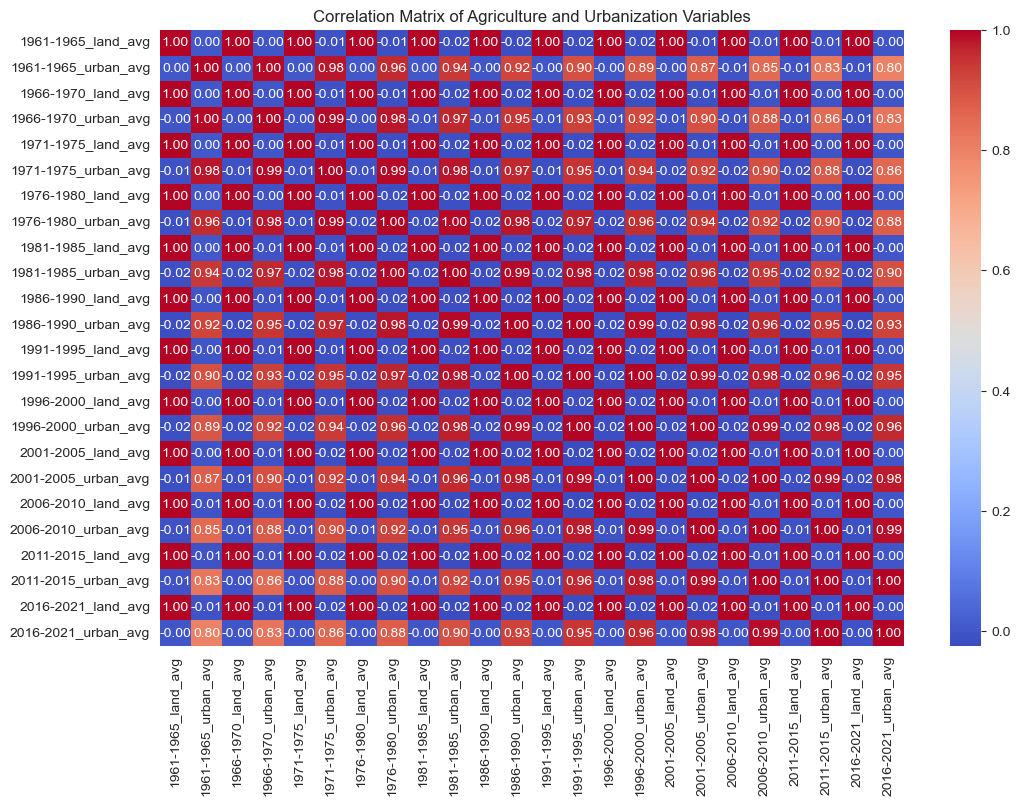

In [440]:
# Visualizing the Correlation

# Select only numeric columns for correlation calculation
numeric_df = Agriculture.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Enhance the plot
plt.title('Correlation Matrix of Agriculture and Urbanization Variables')
plt.show()



# The heatmap  provided here shows a correlation matrix of agriculture (land) and urbanization (urban) variables averaged over different time periods. The matrix displays correlation coefficients, which measure the linear relationship between two variables, with a scale from -1 to 1 where:

1 or close to 1 (Red): Indicates a very strong positive correlation. For the diagonal, it's always 1 because it's the correlation of the variable with itself.
0 (White): Indicates no linear correlation.
-1 or close to -1 (Blue): Indicates a very strong negative correlation.
In this heatmap:

# Diagonal Entries:
All diagonal entries are 1 (deep red), as expected, since it's the correlation of each variable with itself.

# Off-Diagonal Entries: 
Most off-diagonal entries, especially between corresponding land and urban variables from different time periods, are showing very high positive correlations (also red, but not as deep as 1). This suggests that there is a consistent positive linear relationship between the extent of agricultural land use and the level of urbanization across different periods
.
# Land and Urban Correlations:   
When looking at the correlations between land and urban averages within the same time periods (e.g., '1961-1965_land_avg' with '1961-1965_urban_avg'), they are slightly above 0 (light red), indicating a small positive correlation. However, since these values are not very high, the relationship may not be very strong.

# Interpretation:

The strong positive correlations across different periods may be influenced by the fact that both land and urban data could be trending upwards or downwards over time, 

The weaker correlations between land and urban averages within the same time periods suggest that while there may be some relationship between agricultural land use and urbanization, it is not as pronounced as the correlation across time.

This pattern suggests that while changes in agricultural land use and urbanization are positively associated with each other, the relationship is not particularly strong.

It is important to consider other factors that might influence these variables, such as economic development, technological, GDP or other factors. Moreover,since correlation does not imply causation, I blieve futher analysis is needed to understand the causative factors behind these trends.

In [ ]:
Agriculture.head()

In [ ]:
Agriculture.isna().sum()

In [441]:
import statsmodels.api as sm


#H0: 
#H1: 
#Defingh our x or indpedent variable and y dependent variable 
X = Agriculture['1961-1965_urban_avg'] # our independent variable our feature variable
y = Agriculture['1961-1965_land_avg'] # our dependent variable or target variable


#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     1961-1965_land_avg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                 0.0006084
Date:                Fri, 01 Mar 2024   Prob (F-statistic):              0.980
Time:                        00:34:30   Log-Likelihood:                -2188.9
No. Observations:                 154   AIC:                             4382.
Df Residuals:                     152   BIC:                             4388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.728e+04   5

In [442]:

#Defingh our x or indpedent variable and y dependent variable 
X = Agriculture['1966-1970_urban_avg'] # our independent variable our feature variable
y = Agriculture['1966-1970_land_avg'] # our dependent variable or target variable


#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     1966-1970_land_avg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                  0.002143
Date:                Fri, 01 Mar 2024   Prob (F-statistic):              0.963
Time:                        00:34:34   Log-Likelihood:                -2191.0
No. Observations:                 154   AIC:                             4386.
Df Residuals:                     152   BIC:                             4392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.131e+04   5

In [ ]:
Agriculture.head()

In [443]:
#Defingh our x or indpedent variable and y dependent variable 
X = Agriculture['1971-1975_urban_avg'] # our independent variable our feature variable
y = Agriculture['1971-1975_land_avg'] # our dependent variable or target variable


#add constant to predictor variables
X = sm.add_constant(X)

#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     1971-1975_land_avg   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.01811
Date:                Fri, 01 Mar 2024   Prob (F-statistic):              0.893
Time:                        00:34:38   Log-Likelihood:                -2192.9
No. Observations:                 154   AIC:                             4390.
Df Residuals:                     152   BIC:                             4396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.663e+04    

# Interpretation
# We can see that the p value for all these range of year is respectfully as 0.980, 0.963, 0.893

The p-value associated with 1961-1965_urban_avg is 0.980, which is much higher than the common significance levels (0.05, 0.01). A high p-value indicates that there is weak evidence against the null hypothesis of no effect, meaning we cannot reject the null hypothesis. In this context, it means that there is no statistically
significant relationship between urbanization 

